## Data Processing

In [226]:
import pandas as pd
import sklearn.metrics as sm
data = pd.read_csv('car_price.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [227]:

data['brand'] = data['CarName'].str.split(' ').str[0]
data.loc[[182, 189, 190], 'brand'] = "volkswagen"
stored_data = data.copy()
data = data.drop('CarName', axis=1)
data = data.iloc[:, 1:26] # remove id
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### Z_score for morbid data detection

In [228]:

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns


z_scores = (data[numerical_cols] - data[numerical_cols].mean()) / data[numerical_cols].std()


threshold = 3.0

outliers = (z_scores.abs() > threshold)

num_outliers = outliers.sum()
print("Number of outliers per numerical column:")
print(num_outliers)

rows_with_outliers = outliers.any(axis=1)
num_rows = rows_with_outliers.sum()
print(f"\nNumber of rows with at least one outlier: {num_rows}")

abnormal_data = data[rows_with_outliers]

print("Abnormal data with at least one outlier:")
print(abnormal_data)


Number of outliers per numerical column:
symboling           0
wheelbase           1
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          5
boreratio           0
stroke              3
compressionratio    9
horsepower          2
peakrpm             2
citympg             3
highwaympg          2
price               3
dtype: int64

Number of rows with at least one outlier: 24
Abnormal data with at least one outlier:
     symboling fueltype aspiration doornumber    carbody drivewheel  \
16           0      gas        std        two      sedan        rwd   
18           2      gas        std        two  hatchback        fwd   
30           2      gas        std        two  hatchback        fwd   
47           0      gas        std       four      sedan        rwd   
48           0      gas        std       four      sedan        rwd   
49           0      gas        std        two      sedan        rwd   
63           0   diesel        s

### Z-score Distribution Plot

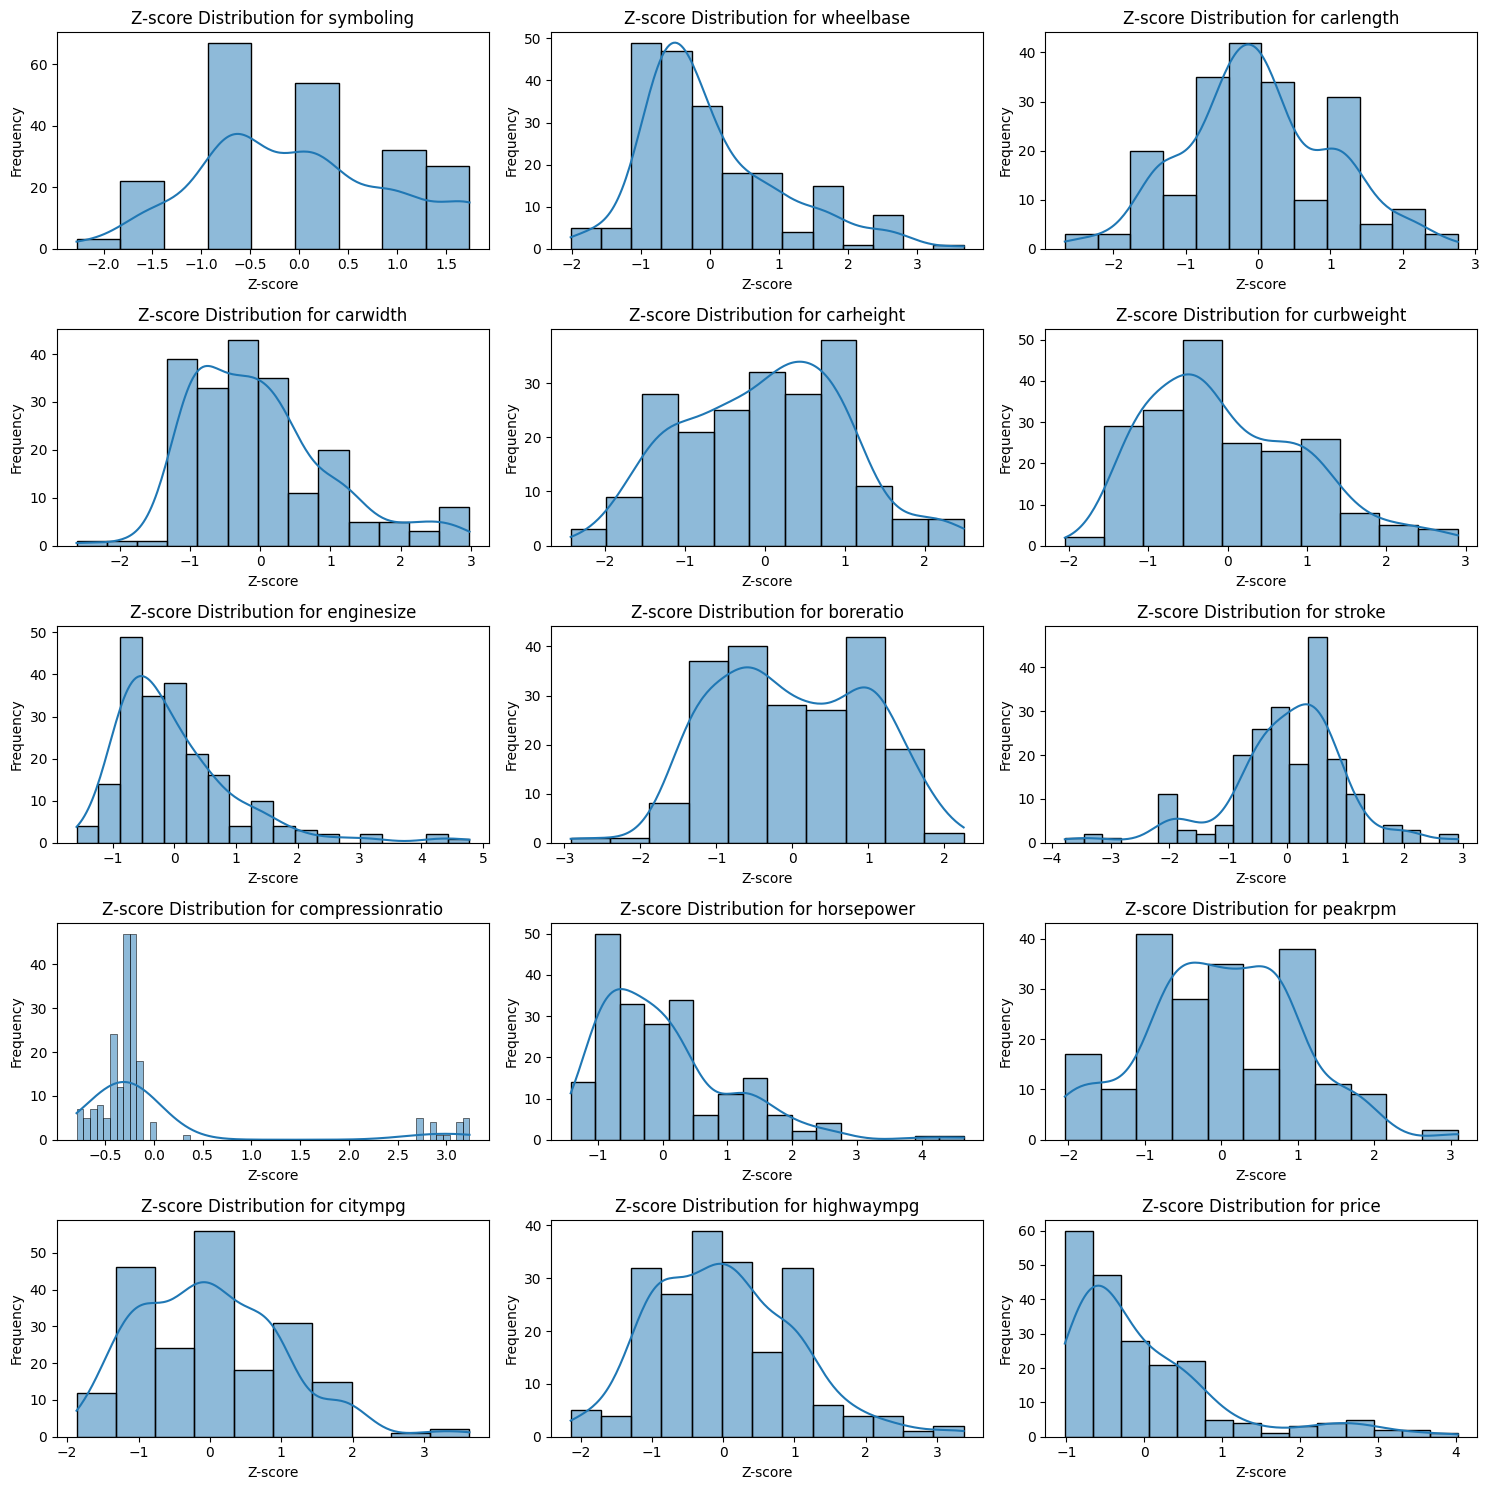

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the z-score distribution for each numerical column
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(z_scores[col], kde=True)
    plt.title(f'Z-score Distribution for {col}')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Label Encoding using CatBoostEncoder

In [230]:
from category_encoders import CatBoostEncoder

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

encoder = CatBoostEncoder(cols=categorical_cols)# minimize overfitting and increase robust

data_encoded = encoder.fit_transform(data, data['price'])

data_encoded.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,13276.710571,13276.710571,13276.710571,13276.710571,13276.710571,13276.710571,88.6,168.8,64.1,...,13276.710571,3.47,2.68,9.0,111,5000,21,27,13495.0,13276.710571
1,3,13385.855285,13385.855285,13385.855285,13385.855285,13385.855285,13385.855285,88.6,168.8,64.1,...,13385.855285,3.47,2.68,9.0,111,5000,21,27,16500.0,13385.855285
2,1,14423.903524,14423.903524,14423.903524,13276.710571,14423.903524,14423.903524,94.5,171.2,65.5,...,14423.903524,2.68,3.47,9.0,154,5000,19,26,16500.0,14423.903524
3,2,14942.927643,14942.927643,13276.710571,13276.710571,13276.710571,14942.927643,99.8,176.6,66.2,...,14942.927643,3.19,3.40,10.0,102,5500,24,30,13950.0,13276.710571
4,2,14744.342114,14744.342114,13613.355285,13613.355285,13276.710571,14744.342114,99.4,176.6,66.4,...,14744.342114,3.19,3.40,8.0,115,5500,18,22,17450.0,13613.355285


### Correlation

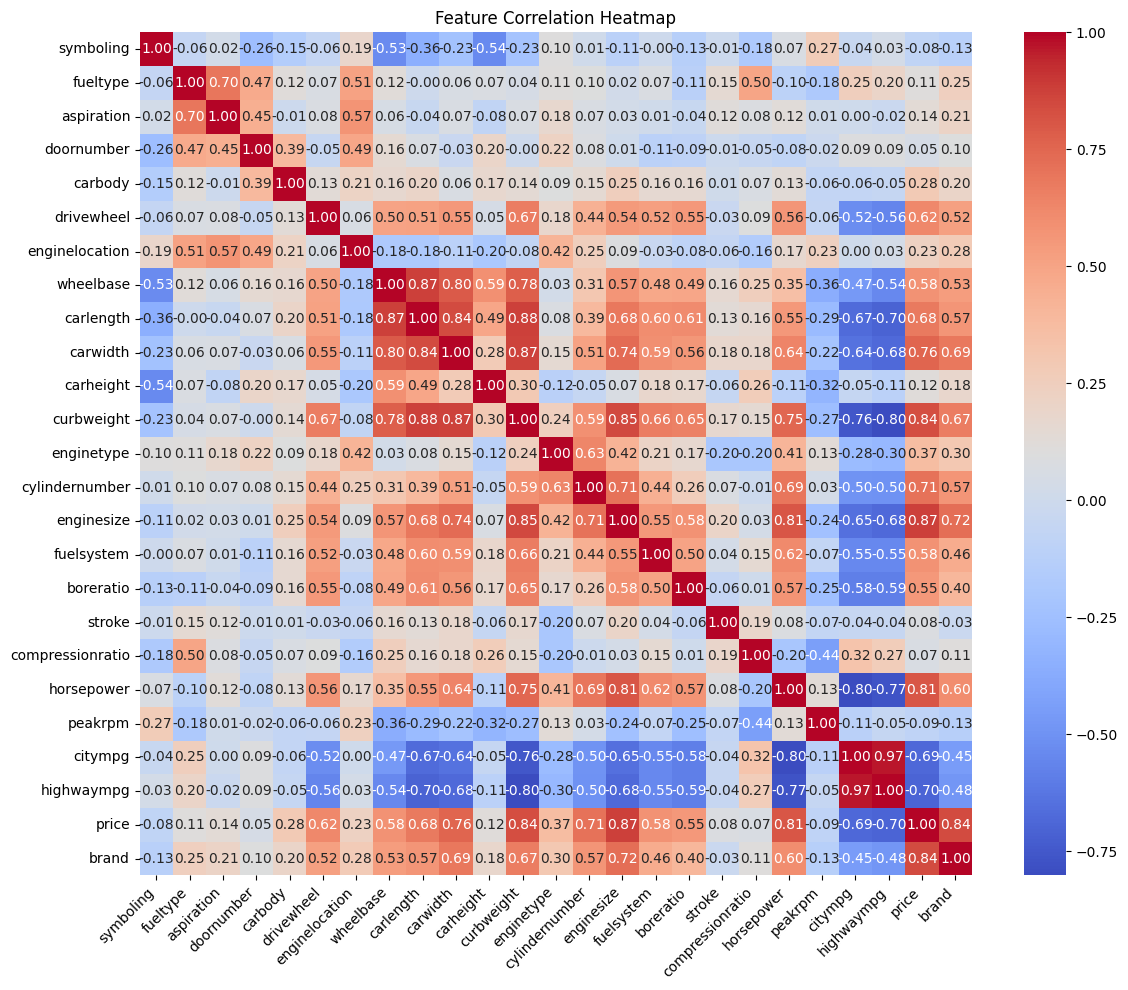

In [231]:
import seaborn as sns
import matplotlib.pyplot as mp

mp.figure(figsize=(12, 10))
correlation = data_encoded.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
mp.title('Feature Correlation Heatmap')
mp.xticks(rotation=45, ha='right')
mp.yticks(rotation=0)
mp.tight_layout()
mp.show()


### Feature merging 

In [232]:
high_corr = correlation.unstack()
high_corr = high_corr[high_corr > 0.8]
high_corr = high_corr[high_corr < 1]

high_corr = high_corr.drop_duplicates()

for a, b in high_corr.index:
    print(f"{a} - {b}")


wheelbase - carlength
carlength - carwidth
carlength - curbweight
carwidth - curbweight
curbweight - enginesize
curbweight - price
enginesize - horsepower
enginesize - price
horsepower - price
citympg - highwaympg
price - brand


In [233]:
# feature merge
price = data_encoded["price"]
carbody = data_encoded['carbody']
data_encoded = data_encoded.drop(["highwaympg", "enginesize", "wheelbase", "price", "carbody"], axis=1)

data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    float64
 2   aspiration        205 non-null    float64
 3   doornumber        205 non-null    float64
 4   drivewheel        205 non-null    float64
 5   enginelocation    205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    float64
 11  cylindernumber    205 non-null    float64
 12  fuelsystem        205 non-null    float64
 13  boreratio         205 non-null    float64
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1

## FA
### PreTesting for FA

In [234]:
# results for kmo and barlett
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
kmo = calculate_kmo(data_encoded)# kmo > 0.7, correlations relatively compact
bartlett = calculate_bartlett_sphericity(data_encoded)# < 0.05 means variables are correlated
kmo[1], bartlett[1]


(0.8035373239039203, 0.0)

### Std analyzing

In [235]:
fa = FactorAnalyzer(rotation=None, n_factors=14, method='principal') 
fa.fit(data_encoded) 
fa_sd = fa.get_factor_variance() 
fa_df = pd.DataFrame( {'eigeon value': fa_sd[0],
                       'variance contribution rate':fa_sd[1], 
                       'variance overall contribution rate':fa_sd[2]})

print(sum(fa_sd[1])) # 14 factors account for 95 percent of the data
print(fa_df)

0.9646254644747317
    eigeon value  variance contribution rate  \
0       6.602030                    0.330101   
1       2.942172                    0.147109   
2       2.732131                    0.136607   
3       1.441222                    0.072061   
4       1.083674                    0.054184   
5       0.908388                    0.045419   
6       0.721047                    0.036052   
7       0.586993                    0.029350   
8       0.543364                    0.027168   
9       0.436849                    0.021842   
10      0.383532                    0.019177   
11      0.348118                    0.017406   
12      0.322629                    0.016131   
13      0.240363                    0.012018   

    variance overall contribution rate  
0                             0.330101  
1                             0.477210  
2                             0.613817  
3                             0.685878  
4                             0.740061  
5             

In [236]:
# first 7 factors accounts for 80 percent of the data
fa = FactorAnalyzer(rotation=None, n_factors=7, method='principal') 
fa.fit(data_encoded) 
fa_sd = fa.get_factor_variance() 
fa_df = pd.DataFrame( {'eigeon value': fa_sd[0],
                       'variance contribution rate':fa_sd[1], 
                       'variance overall contribution rate':fa_sd[2]})

print(fa_df)
print(fa.get_communalities())

   eigeon value  variance contribution rate  \
0      6.602030                    0.330101   
1      2.942172                    0.147109   
2      2.732131                    0.136607   
3      1.441222                    0.072061   
4      1.083674                    0.054184   
5      0.908388                    0.045419   
6      0.721047                    0.036052   

   variance overall contribution rate  
0                            0.330101  
1                            0.477210  
2                            0.613817  
3                            0.685878  
4                            0.740061  
5                            0.785481  
6                            0.821533  
[0.70657926 0.9060426  0.8080799  0.77552616 0.64397169 0.80332929
 0.89458165 0.83436273 0.77299443 0.94112643 0.83881114 0.89215276
 0.67672955 0.79720348 0.9185518  0.88168812 0.88331553 0.91000271
 0.87483198 0.6707814 ]


In [237]:
# Extracting Factor Loadings
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, 
                              index=data_encoded.columns, 
                              columns=[f'Factor {i+1}' for i in range(7)])
print(loadings_df)

                  Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  Factor 6  \
symboling        -0.182225  0.278231 -0.534497  0.504941 -0.177310 -0.149368   
fueltype          0.059509  0.600660  0.676811  0.248750 -0.083612 -0.078990   
aspiration        0.100857  0.711102  0.368251  0.130382  0.185335 -0.316497   
doornumber        0.019596  0.545934  0.441329 -0.460780  0.245093 -0.014111   
drivewheel        0.717254  0.025714 -0.055469  0.120754 -0.173597 -0.266953   
enginelocation    0.046350  0.882921  0.045651 -0.088069 -0.002636 -0.108501   
carlength         0.852392 -0.285820  0.211570 -0.121985  0.159522 -0.018411   
carwidth          0.879082 -0.145625  0.131856  0.083021  0.106253  0.051310   
carheight         0.248923 -0.356886  0.561215 -0.459978  0.038325  0.037018   
curbweight        0.953948 -0.118203  0.085876  0.045134  0.070070  0.023471   
enginetype        0.356045  0.547230 -0.251467 -0.258931 -0.304987  0.399343   
cylindernumber    0.678488  0.336557 -0.

### Orthogonal Rotation

In [238]:
# factor 1, 2, 3 too close for carbody
# carbody           0.235846  0.211742  0.232462 -0.440383  0.075134  0.684007  
# we expect factors are non-correlated
fa = FactorAnalyzer(rotation='quartimax', n_factors=7, method='principal') 
fa.fit(data_encoded) 
fa_sd = fa.get_factor_variance() 
fa_df = pd.DataFrame( {'eigeon value': fa_sd[0],
                       'variance contribution rate':fa_sd[1], 
                       'variance overall contribution rate':fa_sd[2]})

loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, 
                              index=data_encoded.columns, 
                              columns=[f'Factor {i+1}' for i in range(7)])
print(loadings_df)

                  Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  Factor 6  \
symboling        -0.112473  0.003196 -0.023583 -0.817499 -0.031724  0.032025   
fueltype         -0.013640  0.800511  0.501607  0.044729  0.073966  0.025414   
aspiration        0.071795  0.880523  0.023442 -0.097498  0.100990 -0.084420   
doornumber       -0.080467  0.700131 -0.209451  0.455811  0.011067  0.159756   
drivewheel        0.745646  0.087088  0.118347 -0.140572 -0.206229 -0.063842   
enginelocation   -0.017343  0.793388 -0.124248 -0.168624 -0.121462  0.290807   
carlength         0.843468 -0.070408  0.040378  0.389817  0.091015 -0.067205   
carwidth          0.868508 -0.019538  0.137637  0.176896  0.158023  0.038995   
carheight         0.201368 -0.049852  0.191291  0.808360 -0.124054 -0.143273   
curbweight        0.938984 -0.003141  0.064668  0.142569  0.111409  0.080344   
enginetype        0.235406  0.220894 -0.162140 -0.101156 -0.209698  0.808740   
cylindernumber    0.581173  0.067066  0.

### Hierarchical Cluster

In [239]:
fa_rotate = fa
factor_result = pd.DataFrame(
    fa_rotate.fit_transform(data_encoded), columns=list('1234567')
)
factor_result['factor_type'] = factor_result.idxmax(axis=1)
factor_result.head()

,1,2,3,4,5,6,7,factor_type
0,0.004521,-0.553277,-0.295429,-1.905650,-1.433475,-0.019871,-0.804281,1
1,0.011401,-0.479221,-0.294134,-1.901222,-1.442482,-0.009902,-0.800932,1
2,0.091444,0.027027,0.039962,-0.127486,1.228217,0.492487,0.899893,5
3,0.077018,0.132939,0.490016,-0.342815,0.392864,-0.117605,1.169375,7
4,0.394890,0.137005,-0.175752,-0.265113,0.557840,-0.263415,1.120445,7


### Preparations for Cluster

In [240]:
factor_result = pd.concat([data_encoded, factor_result['factor_type']], axis=1)

factor_result['factor_type'] = factor_result['factor_type'].astype('int64')

# normalize factor_type
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
factor_result['price'] = price
factor_result['carbody'] = carbody
# Normalize the 'factor_type', 'price', and 'carbody' columns
factor_result[['n_factor_type', 'n_price', 'n_carbody']] = scaler.fit_transform(
    factor_result[['factor_type', 'price', 'carbody']]
)

factor_result.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,...,horsepower,peakrpm,citympg,brand,factor_type,price,carbody,n_factor_type,n_price,n_carbody
0,3,13276.710571,13276.710571,13276.710571,13276.710571,13276.710571,168.8,64.1,48.8,2548,...,111,5000,21,13276.710571,1,13495.0,13276.710571,-1.610548,0.027391,-0.183301
1,3,13385.855285,13385.855285,13385.855285,13385.855285,13385.855285,168.8,64.1,48.8,2548,...,111,5000,21,13385.855285,1,16500.0,13385.855285,-1.610548,0.404461,-0.154989
2,1,14423.903524,14423.903524,14423.903524,14423.903524,14423.903524,171.2,65.5,52.4,2823,...,154,5000,19,14423.903524,5,16500.0,13276.710571,0.387409,0.404461,-0.183301
3,2,14942.927643,14942.927643,13276.710571,13276.710571,14942.927643,176.6,66.2,54.3,2337,...,102,5500,24,13276.710571,7,13950.0,13276.710571,1.386387,0.084485,-0.183301
4,2,14744.342114,14744.342114,13613.355285,13276.710571,14744.342114,176.6,66.4,54.3,2824,...,115,5500,18,13613.355285,7,17450.0,13613.355285,1.386387,0.523668,-0.095975


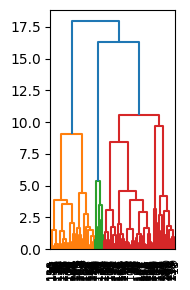

In [ ]:
# hierarchical clustering
from scipy.cluster import hierarchy
Z = hierarchy.linkage(factor_result[['n_factor_type', 'n_price', 'n_carbody']],
                     method='ward', metric='euclidean')

mp.figure(figsize=(6, 9))
hierarchy.dendrogram(Z, labels=factor_result.index,
    leaf_rotation=90,        
    leaf_font_size=8,        
    show_leaf_counts=False)   
mp.tight_layout()
mp.show()

### Plot Interpretation, result score

In [242]:
# view the plot, the final three merge has the largest distance
# perform cut at 10, get 4 clusters
label = hierarchy.cut_tree(Z, height=10)
label = label.reshape(label.size)
factor_result['type'] = list(label)
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define the features used for clustering
features = factor_result[['n_factor_type', 'n_price', 'n_carbody']]

# Compute Silhouette Score
sil_score = silhouette_score(features, factor_result['type'])
print(f'Silhouette Score: {sil_score:.4f}')

# Compute Calinski-Harabasz Score
ch_score = calinski_harabasz_score(features, factor_result['type'])
print(f'Calinski-Harabasz Score: {ch_score:.4f}')

# Compute Davies-Bouldin Score
db_score = davies_bouldin_score(features, factor_result['type'])
print(f'Davies-Bouldin Score: {db_score:.4f}')

factor_result.info()

Silhouette Score: 0.2835
Calinski-Harabasz Score: 87.8302
Davies-Bouldin Score: 1.2783
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    float64
 2   aspiration        205 non-null    float64
 3   doornumber        205 non-null    float64
 4   drivewheel        205 non-null    float64
 5   enginelocation    205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    float64
 11  cylindernumber    205 non-null    float64
 12  fuelsystem        205 non-null    float64
 13  boreratio         205 non-null    float64
 14  stroke            205 non-null    float64
 15  comp

### Std test for FA

In [243]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# variance test 
a = anova_lm(ols('price ~ C(type)', data=factor_result[['price', 'type']]).fit())
b = anova_lm(ols('carbody ~ C(type)', data=factor_result[['carbody', 'type']]).fit())
c = anova_lm(ols('factor_type ~ C(type)', data=factor_result[['factor_type', 'type']]).fit())

a['name'] = 'price'
b['name'] = 'carbody'
c['name'] = 'factor_type'

f_result = pd.concat([a, b, c])

# Reset index to have a clean DataFrame
f_result.reset_index(inplace=True)

f_result.rename(columns={'index': 'Source'}, inplace=True)

# Display the final ANOVA results with F and PR(>F)
# PR(>F) < 0.05 means reject H0 hypothesis
print(f_result)

     Source     df        sum_sq       mean_sq           F        PR(>F)  \
0   C(type)    3.0  9.170561e+09  3.056854e+09  159.629815  6.181610e-53   
1  Residual  201.0  3.849078e+09  1.914964e+07         NaN           NaN   
2   C(type)    3.0  8.154253e+08  2.718084e+08   24.486928  1.508741e-13   
3  Residual  201.0  2.231129e+09  1.110014e+07         NaN           NaN   
4   C(type)    3.0  5.996481e+02  1.998827e+02  180.950467  7.488293e-57   
5  Residual  201.0  2.220299e+02  1.104627e+00         NaN           NaN   

          name  
0        price  
1        price  
2      carbody  
3      carbody  
4  factor_type  
5  factor_type  


### Cluster Processing

In [244]:
nor = pd.crosstab(factor_result['type'], factor_result['factor_type'], normalize=0)
price_mean = factor_result.groupby("type")['price'].mean()
result_price = pd.concat([nor, price_mean], axis=1)
result_price

,1,2,3,4,5,6,7,price
type,,,,,,,,
0,0.583333,0.277778,0.111111,0.000000,0.027778,0.000000,0.000000,17184.907417
1,0.048780,0.097561,0.268293,0.439024,0.146341,0.000000,0.000000,9745.786585
2,0.000000,0.000000,0.000000,0.000000,0.219178,0.260274,0.520548,10964.047945
3,0.142857,0.214286,0.071429,0.000000,0.142857,0.357143,0.071429,35967.071429


In [245]:
factor_result['carbody_str'] = stored_data['carbody']

result_carbody = pd.crosstab(factor_result['type'], factor_result['carbody_str'], normalize='index') * 100
result_carbody['mean_price'] = result_price['price']
print(result_carbody)

carbody_str  convertible    hardtop  hatchback      sedan      wagon  \
type                                                                   
0               8.333333  13.888889  13.888889  55.555556   8.333333   
1               0.000000   0.000000  28.048780  51.219512  20.731707   
2               1.369863   0.000000  57.534247  34.246575   6.849315   
3              14.285714  21.428571   0.000000  64.285714   0.000000   

carbody_str    mean_price  
type                       
0            17184.907417  
1             9745.786585  
2            10964.047945  
3            35967.071429  


In [246]:
factor_result['type'] = factor_result['type'].map(
    {
        0: "Mid-high end comfortable cars",
        1: "Mid price comfortable cars",
        2: "Mid price practical cars",
        3: "Luxury Premium Cars"
    }
)
factor_result['brand'] = stored_data['brand']
factor_result.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,...,citympg,brand,factor_type,price,carbody,n_factor_type,n_price,n_carbody,type,carbody_str
0,3,13276.710571,13276.710571,13276.710571,13276.710571,13276.710571,168.8,64.1,48.8,2548,...,21,alfa-romero,1,13495.0,13276.710571,-1.610548,0.027391,-0.183301,Mid-high end comfortable cars,convertible
1,3,13385.855285,13385.855285,13385.855285,13385.855285,13385.855285,168.8,64.1,48.8,2548,...,21,alfa-romero,1,16500.0,13385.855285,-1.610548,0.404461,-0.154989,Mid-high end comfortable cars,convertible
2,1,14423.903524,14423.903524,14423.903524,14423.903524,14423.903524,171.2,65.5,52.4,2823,...,19,alfa-romero,5,16500.0,13276.710571,0.387409,0.404461,-0.183301,Mid price comfortable cars,hatchback
3,2,14942.927643,14942.927643,13276.710571,13276.710571,14942.927643,176.6,66.2,54.3,2337,...,24,audi,7,13950.0,13276.710571,1.386387,0.084485,-0.183301,Mid price practical cars,sedan
4,2,14744.342114,14744.342114,13613.355285,13276.710571,14744.342114,176.6,66.4,54.3,2824,...,18,audi,7,17450.0,13613.355285,1.386387,0.523668,-0.095975,Mid price practical cars,sedan


### Volkswagen Related cluster

In [247]:
# focus on volkswagen

result_final = pd.DataFrame()
volkswagen_data = factor_result[factor_result['brand'] == "volkswagen"]

result_final['type'] = volkswagen_data['type'].unique()
result_final['product_num'] = volkswagen_data.groupby("type").size().values
result_final['volkswagen_type_mean_price'] = volkswagen_data.groupby("type")['price'].mean().values
result_final.set_index('type', inplace=True)
result_final

,product_num,volkswagen_type_mean_price
type,,
Mid price comfortable cars,4,9777.5
Mid price practical cars,8,10227.5


In [248]:
for typ in result_final.index:
    result_final.loc[typ, 'related_type_mean_price'] = factor_result[factor_result['type'] == typ]['price'].mean()

result_final

,product_num,volkswagen_type_mean_price,related_type_mean_price
type,,,
Mid price comfortable cars,4,9777.5,9745.786585
Mid price practical cars,8,10227.5,10964.047945


In [249]:
all_carbody_categories = factor_result['carbody_str'].unique().tolist()

carbody_volkswagen = pd.crosstab(
    volkswagen_data['type'], 
    volkswagen_data['carbody_str'], 
    normalize='index'
).reindex(columns=all_carbody_categories, fill_value=0) * 100

carbody_volkswagen.columns = [f'volkswagen_carbody_{col}' for col in carbody_volkswagen.columns]
result_final = result_final.join(carbody_volkswagen)

typed_cars = factor_result[(factor_result['type'] == 'Mid price comfortable cars') | 
                           (factor_result['type'] == 'Mid price practical cars')]

# Process Economy Efficient Cars carbody distribution
carbody_typed = pd.crosstab(
    typed_cars['type'], 
    typed_cars['carbody_str'], 
    normalize='index'
).reindex(columns=all_carbody_categories, fill_value=0) * 100

carbody_typed.columns = [f'type_carbody_{col}' for col in carbody_typed.columns]
result_final = result_final.join(carbody_typed)

print(result_final)

                            product_num  volkswagen_type_mean_price  \
type                                                                  
Mid price comfortable cars            4                      9777.5   
Mid price practical cars              8                     10227.5   

                            related_type_mean_price  \
type                                                  
Mid price comfortable cars              9745.786585   
Mid price practical cars               10964.047945   

                            volkswagen_carbody_convertible  \
type                                                         
Mid price comfortable cars                             0.0   
Mid price practical cars                              12.5   

                            volkswagen_carbody_hatchback  \
type                                                       
Mid price comfortable cars                           0.0   
Mid price practical cars                            12.5   

    

In [250]:
# Initialize the DataFrame with 'mean_price' and various percentage metrics as the index
display = pd.DataFrame(
    index=[
        'mean_price', 
        'sedan_percent', 
        'hatchback_percent', 
        'wagon_percent',
        'hardtop_percent',  # Ensure this is included in the index
        'convertible_percent'  # Adding convertible percent
    ]
)

# Assign mean prices
display.loc['mean_price', 'volkswagen_comfortable'] = result_final.at['Mid price comfortable cars', 'volkswagen_type_mean_price']
display.loc['mean_price', 'volkswagen_practical'] = result_final.at['Mid price practical cars', 'volkswagen_type_mean_price']
display.loc['mean_price', 'Mid price comfortable cars'] = result_final.at['Mid price comfortable cars', 'related_type_mean_price']
display.loc['mean_price', 'Mid price practical cars'] = result_final.at['Mid price practical cars', 'related_type_mean_price']

# Assign sedan percentages
display.loc['sedan_percent', 'volkswagen_comfortable'] = result_final.at['Mid price comfortable cars', 'volkswagen_carbody_sedan']
display.loc['sedan_percent', 'volkswagen_practical'] = result_final.at['Mid price practical cars', 'volkswagen_carbody_sedan']
display.loc['sedan_percent', 'Mid price comfortable cars'] = result_final.at['Mid price comfortable cars', 'type_carbody_sedan']
display.loc['sedan_percent', 'Mid price practical cars'] = result_final.at['Mid price practical cars', 'type_carbody_sedan']

# Assign hatchback percentages
display.loc['hatchback_percent', 'volkswagen_comfortable'] = result_final.at['Mid price comfortable cars', 'volkswagen_carbody_hatchback']
display.loc['hatchback_percent', 'volkswagen_practical'] = result_final.at['Mid price practical cars', 'volkswagen_carbody_hatchback']
display.loc['hatchback_percent', 'Mid price comfortable cars'] = result_final.at['Mid price comfortable cars', 'type_carbody_hatchback']
display.loc['hatchback_percent', 'Mid price practical cars'] = result_final.at['Mid price practical cars', 'type_carbody_hatchback']

# Assign wagon percentages
display.loc['wagon_percent', 'volkswagen_comfortable'] = result_final.at['Mid price comfortable cars', 'volkswagen_carbody_wagon']
display.loc['wagon_percent', 'volkswagen_practical'] = result_final.at['Mid price practical cars', 'volkswagen_carbody_wagon']
display.loc['wagon_percent', 'Mid price comfortable cars'] = result_final.at['Mid price comfortable cars', 'type_carbody_wagon']
display.loc['wagon_percent', 'Mid price practical cars'] = result_final.at['Mid price practical cars', 'type_carbody_wagon']

# Assign hardtop percentages
display.loc['hardtop_percent', 'volkswagen_comfortable'] = result_final.at['Mid price comfortable cars', 'volkswagen_carbody_hardtop']
display.loc['hardtop_percent', 'volkswagen_practical'] = result_final.at['Mid price practical cars', 'volkswagen_carbody_hardtop']
display.loc['hardtop_percent', 'Mid price comfortable cars'] = result_final.at['Mid price comfortable cars', 'type_carbody_hardtop']
display.loc['hardtop_percent', 'Mid price practical cars'] = result_final.at['Mid price practical cars', 'type_carbody_hardtop']

# Assign convertible percentages
display.loc['convertible_percent', 'volkswagen_comfortable'] = result_final.at['Mid price comfortable cars', 'volkswagen_carbody_convertible']
display.loc['convertible_percent', 'volkswagen_practical'] = result_final.at['Mid price practical cars', 'volkswagen_carbody_convertible']
display.loc['convertible_percent', 'Mid price comfortable cars'] = result_final.at['Mid price comfortable cars', 'type_carbody_convertible']
display.loc['convertible_percent', 'Mid price practical cars'] = result_final.at['Mid price practical cars', 'type_carbody_convertible']

# Display the resulting DataFrame
print(display)

                     volkswagen_comfortable  volkswagen_practical  \
mean_price                           9777.5               10227.5   
sedan_percent                         100.0                  62.5   
hatchback_percent                       0.0                  12.5   
wagon_percent                           0.0                  12.5   
hardtop_percent                         0.0                   0.0   
convertible_percent                     0.0                  12.5   

                     Mid price comfortable cars  Mid price practical cars  
mean_price                          9745.786585              10964.047945  
sedan_percent                         51.219512                 34.246575  
hatchback_percent                     28.048780                 57.534247  
wagon_percent                         20.731707                  6.849315  
hardtop_percent                        0.000000                  0.000000  
convertible_percent                    0.000000             

### Filter competitors

In [251]:
filtered_result = factor_result[factor_result['type'].isin(['Mid price comfortable cars',
                                                            'Mid price practical cars'])]


indices = filtered_result.index

filtered_data = stored_data.loc[indices, ['CarName', 'price', 'carbody', 'brand']]
filtered_data['type'] = factor_result.loc[indices, 'type']

mean_prices = {
    'Mid price comfortable cars': display.loc['mean_price', "volkswagen_comfortable"],
    'Mid price practical cars': display.loc['mean_price', "volkswagen_practical"]
}
price_interval = [0.8, 1.2]
filtered_data = filtered_data[
    filtered_data.apply(lambda row: price_interval[0] * mean_prices[row['type']] <= row['price'] 
                        <= price_interval[1] * mean_prices[row['type']], axis=1)
]

filtered_data = filtered_data[filtered_data['brand'] != "volkswagen"]

In [252]:
comfortable_competitor = filtered_data[filtered_data['type'] == 'Mid price comfortable cars']
comfortable_competitor.reset_index()
print(comfortable_competitor)

                      CarName    price    carbody       brand  \
23                 dodge d200   7957.0  hatchback       dodge   
28          dodge dart custom   8921.0      wagon       dodge   
39              honda prelude   8845.0      sedan       honda   
40               honda accord  10295.0      sedan       honda   
42         honda civic (auto)  10345.0      sedan       honda   
44               isuzu D-Max    8916.5      sedan       isuzu   
46               isuzu D-Max   11048.0  hatchback       isuzu   
60         mazda glc custom l   8495.0      sedan       mazda   
62                 mazda rx-4  10245.0      sedan       mazda   
63           mazda glc deluxe  10795.0      sedan       mazda   
64                  mazda 626  11245.0  hatchback       mazda   
86          mitsubishi pajero   8189.0      sedan  mitsubishi   
87       mitsubishi outlander   9279.0      sedan  mitsubishi   
88       mitsubishi mirage g4   9279.0      sedan  mitsubishi   
97                nissan 

In [253]:
practical_competitor = filtered_data[filtered_data['type'] == 'Mid price practical cars']
practical_competitor.reset_index()
print(practical_competitor)

                       CarName    price    carbody       brand  \
27        dodge coronet custom   8558.0      sedan       dodge   
38            honda civic 1300   9095.0  hatchback       honda   
45         isuzu D-Max V-Cross   8916.5      sedan       isuzu   
55                   mazda 626  10945.0  hatchback       mazda   
56                   mazda glc  11845.0  hatchback       mazda   
59                   mazda 626   8845.0  hatchback       mazda   
61            mazda glc custom  10595.0  hatchback       mazda   
80        mitsubishi mirage g4   9959.0  hatchback  mitsubishi   
81               mitsubishi g4   8499.0  hatchback  mitsubishi   
131              renault 5 gtl   9895.0  hatchback     renault   
165  toyota celica gt liftback   9298.0      sedan      toyota   
166      toyota corolla tercel   9538.0  hatchback      toyota   
175              toyota corona   9988.0  hatchback      toyota   
177             toyota mark ii  11248.0  hatchback      toyota   

         

## Kmeans

In [254]:
# kmeans
import sklearn.cluster as sc

from sklearn.decomposition import PCA

df_cluster = data_encoded.copy()
df_db_cluster = data_encoded.copy()
df_cluster['price'] = price
df_cluster['carbody'] = carbody

df_cluster.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,brand,price,carbody
0,3,13276.710571,13276.710571,13276.710571,13276.710571,13276.710571,168.8,64.1,48.8,2548,...,13276.710571,3.47,2.68,9.0,111,5000,21,13276.710571,13495.0,13276.710571
1,3,13385.855285,13385.855285,13385.855285,13385.855285,13385.855285,168.8,64.1,48.8,2548,...,13385.855285,3.47,2.68,9.0,111,5000,21,13385.855285,16500.0,13385.855285
2,1,14423.903524,14423.903524,14423.903524,14423.903524,14423.903524,171.2,65.5,52.4,2823,...,14423.903524,2.68,3.47,9.0,154,5000,19,14423.903524,16500.0,13276.710571
3,2,14942.927643,14942.927643,13276.710571,13276.710571,14942.927643,176.6,66.2,54.3,2337,...,14942.927643,3.19,3.40,10.0,102,5500,24,13276.710571,13950.0,13276.710571
4,2,14744.342114,14744.342114,13613.355285,13276.710571,14744.342114,176.6,66.4,54.3,2824,...,14744.342114,3.19,3.40,8.0,115,5500,18,13613.355285,17450.0,13613.355285


### Preprocess, add relative weight, PCA

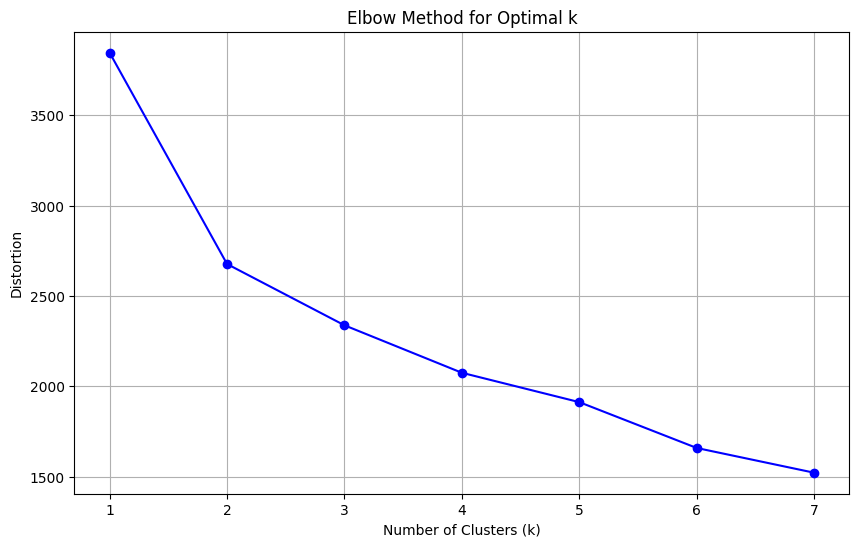

In [255]:
df_pca = df_cluster.copy()
df_cluster_scaled = scaler.fit_transform(df_cluster)
df_cluster_scaled = pd.DataFrame(df_cluster_scaled, columns=df_cluster.columns)
df_cluster_scaled['price'] *= 1.25
df_cluster_scaled['carbody'] *= 1.25

# Initialize inertia list to store distortion values
inertias = []
cluster_range = range(1, 8)
pca = PCA(n_components=0.8, random_state=42)
pca_transformed = pca.fit_transform(df_cluster_scaled)
df_pca = pca_transformed.copy()
for k in cluster_range:
    kmeans = sc.KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)

    kmeans.fit(pca_transformed)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
mp.figure(figsize=(10, 6))
mp.plot(cluster_range, inertias, 'bo-')
mp.xlabel('Number of Clusters (k)')
mp.ylabel('Distortion')
mp.title('Elbow Method for Optimal k')
mp.grid(True)
mp.show()

### Kmeans result interpretation

In [256]:
# choose to divide into 4 clusters basing on elbow point

model = sc.KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42)
model.fit(df_pca)
pred_y = model.labels_
df_cluster['cluster'] = pred_y

In [257]:
sil_score = sm.silhouette_score(df_cluster_scaled, df_cluster['cluster'])
calinski_score = sm.calinski_harabasz_score(df_cluster_scaled, df_cluster['cluster'])
davies_score = sm.davies_bouldin_score(df_cluster_scaled, df_cluster['cluster'])

print(f'Silhouette Score: {sil_score}')
print(f'Calinski-Harabasz Index: {calinski_score}')
print(f'Davies-Bouldin Index: {davies_score}')

Silhouette Score: 0.16417521946094246
Calinski-Harabasz Index: 36.031065198446406
Davies-Bouldin Index: 1.8687572256104548


In [258]:
cluster_num = df_cluster['cluster'].value_counts()
cluster_num

cluster
3    86
4    38
1    34
2    27
0    20
Name: count, dtype: int64

In [259]:
# mean price for all four clusters
result_price = df_cluster.groupby('cluster').mean()['price']
result_price

cluster
0     6622.050000
1    16190.088235
2    28638.765444
3     8490.755814
4    14088.684211
Name: price, dtype: float64

In [260]:
df_cluster['carbody_str'] = stored_data['carbody']

result_carbody = pd.crosstab(df_cluster['cluster'], df_cluster['carbody_str'], normalize='index') * 100

result_carbody['price'] = result_price.values
print(result_carbody)

carbody_str  convertible    hardtop  hatchback      sedan      wagon  \
cluster                                                                
0               0.000000   0.000000  75.000000  25.000000   0.000000   
1               0.000000   0.000000   5.882353  67.647059  26.470588   
2               7.407407  11.111111   7.407407  62.962963  11.111111   
3               1.162791   1.162791  29.069767  53.488372  15.116279   
4               7.894737  10.526316  68.421053  13.157895   0.000000   

carbody_str         price  
cluster                    
0             6622.050000  
1            16190.088235  
2            28638.765444  
3             8490.755814  
4            14088.684211  


In [261]:
df_cluster['cluster'] = df_cluster['cluster'].map(
    {
    0: "Low price economical cars",
    1: "Mid price comfortable cars",
    2: "Luxury commercial cars",
    3: "Mid price practical cars",
    4: "High-end comfortable cars",
    }

)
df_cluster.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,...,stroke,compressionratio,horsepower,peakrpm,citympg,brand,price,carbody,cluster,carbody_str
0,3,13276.710571,13276.710571,13276.710571,13276.710571,13276.710571,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,13276.710571,13495.0,13276.710571,High-end comfortable cars,convertible
1,3,13385.855285,13385.855285,13385.855285,13385.855285,13385.855285,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,13385.855285,16500.0,13385.855285,High-end comfortable cars,convertible
2,1,14423.903524,14423.903524,14423.903524,14423.903524,14423.903524,171.2,65.5,52.4,2823,...,3.47,9.0,154,5000,19,14423.903524,16500.0,13276.710571,High-end comfortable cars,hatchback
3,2,14942.927643,14942.927643,13276.710571,13276.710571,14942.927643,176.6,66.2,54.3,2337,...,3.40,10.0,102,5500,24,13276.710571,13950.0,13276.710571,High-end comfortable cars,sedan
4,2,14744.342114,14744.342114,13613.355285,13276.710571,14744.342114,176.6,66.4,54.3,2824,...,3.40,8.0,115,5500,18,13613.355285,17450.0,13613.355285,High-end comfortable cars,sedan


### PCA visualization

In [262]:
import pandas as pd

import plotly.express as px

# Create a DataFrame for visualization
pca_df = pd.DataFrame(
    df_pca, 
    columns=[f'PC{i+1}' for i in range(df_pca.shape[1])]
)
pca_df['Cluster'] = df_cluster['cluster']

# Create 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    title='Cluster Distribution in PCA Space',
)

fig.update_traces(marker_size = 3)
# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    width=800,
    height=500,
    showlegend=True
)

# Show the plot
fig.show()

/usr/local/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Volkswagen related cluster

In [263]:
df_cluster['brand'] = stored_data['brand']
df_cluster['CarName'] = stored_data['CarName']
volkswagen_data = df_cluster[df_cluster['brand'] == "volkswagen"]
result_final = pd.DataFrame()
result_final['cluster'] = volkswagen_data['cluster'].unique()
result_final['product_number'] = volkswagen_data.groupby("cluster").size().values
result_final['volkswagen_type_mean_price'] = volkswagen_data.groupby("cluster")['price'].mean().values
result_final.set_index("cluster", inplace=True)

print(result_final)

                            product_number  volkswagen_type_mean_price
cluster                                                               
Mid price practical cars                 1                      9980.0
High-end comfortable cars                1                     13295.0
Mid price comfortable cars              10                      9765.5


In [264]:
all_carbody_categories = factor_result['carbody_str'].unique().tolist()

carbody_volkswagen = pd.crosstab(
    volkswagen_data['cluster'],
    volkswagen_data['carbody_str'],
    normalize='index'
).reindex(columns=all_carbody_categories, fill_value=0) * 100

carbody_volkswagen.columns = [f'volkswagen_carbody_{col}' for col in carbody_volkswagen.columns]
result_final = result_final.join(carbody_volkswagen)

typed_cars = df_cluster[
    (df_cluster['cluster'] == 'Mid price comfortable cars') |
    (df_cluster['cluster'] == 'High-end comfortable cars') |
    (df_cluster['cluster'] == 'Mid price practical cars')
]

# Process Economy Efficient Cars carbody distribution
carbody_typed = pd.crosstab(
    typed_cars['cluster'], 
    typed_cars['carbody_str'], 
    normalize='index'
).reindex(columns=all_carbody_categories, fill_value=0) * 100

carbody_typed.columns = [f'type_carbody_{col}' for col in carbody_typed.columns]
result_final = result_final.join(carbody_typed)

result_final


,product_number,volkswagen_type_mean_price,volkswagen_carbody_convertible,volkswagen_carbody_hatchback,volkswagen_carbody_sedan,volkswagen_carbody_wagon,volkswagen_carbody_hardtop,type_carbody_convertible,type_carbody_hatchback,type_carbody_sedan,type_carbody_wagon,type_carbody_hardtop
cluster,,,,,,,,,,,,
Mid price practical cars,1,9980.0,10.0,0.0,80.0,10.0,0,1.162791,29.069767,53.488372,15.116279,1.162791
High-end comfortable cars,1,13295.0,0.0,100.0,0.0,0.0,0,7.894737,68.421053,13.157895,0.000000,10.526316
Mid price comfortable cars,10,9765.5,0.0,0.0,100.0,0.0,0,0.000000,5.882353,67.647059,26.470588,0.000000


In [265]:
display = pd.DataFrame(
    index=[
        'mean_price', 
        'sedan_percent', 
        'hatchback_percent', 
        'wagon_percent',
        'hardtop_percent',  
        'convertible_percent'
    ]
)

# Assign mean prices for Volkswagen and various car types
# Add 'volkswagen_highend' and 'High-end comfortable cars' to the display DataFrame
display.loc['mean_price', 'volkswagen_comfort'] = result_final.at['Mid price comfortable cars', 'volkswagen_type_mean_price']
display.loc['mean_price', 'volkswagen_practical'] = result_final.at['Mid price practical cars', 'volkswagen_type_mean_price']
display.loc['mean_price', 'volkswagen_highend'] = result_final.at['High-end comfortable cars', 'volkswagen_type_mean_price']  # Added line
display.loc['mean_price', 'Mid price comfortable cars'] = result_price[1]
display.loc['mean_price', 'Mid price practical cars'] = result_price[3]
display.loc['mean_price', 'High-end comfortable cars'] = result_price[4]

# Assign sedan percentages
display.loc['sedan_percent', 'volkswagen_comfort'] = result_final.at['Mid price comfortable cars', 'volkswagen_carbody_sedan']
display.loc['sedan_percent', 'volkswagen_practical'] = result_final.at['Mid price practical cars', 'volkswagen_carbody_sedan']
display.loc['sedan_percent', 'volkswagen_highend'] = result_final.at['High-end comfortable cars', 'volkswagen_carbody_sedan']  # Added line
display.loc['sedan_percent', 'Mid price comfortable cars'] = result_carbody.loc[2, "sedan"]  # 'comfortable' mapped to index 2
display.loc['sedan_percent', 'Mid price practical cars'] = result_carbody.loc[0, "sedan"]    # 'practical' mapped to index 0
display.loc['sedan_percent', 'High-end comfortable cars'] = result_carbody.loc[1, "sedan"] 

# Assign hatchback percentages
display.loc['hatchback_percent', 'volkswagen_comfort'] = result_final.at['Mid price comfortable cars', 'volkswagen_carbody_hatchback']
display.loc['hatchback_percent', 'volkswagen_practical'] = result_final.at['Mid price practical cars', 'volkswagen_carbody_hatchback']
display.loc['hatchback_percent', 'volkswagen_highend'] = result_final.at['High-end comfortable cars', 'volkswagen_carbody_hatchback']  # Added line
display.loc['hatchback_percent', 'Mid price comfortable cars'] = result_carbody.loc[2, "hatchback"]  # 'comfortable' mapped to index 2
display.loc['hatchback_percent', 'Mid price practical cars'] = result_carbody.loc[0, "hatchback"]    # 'practical' mapped to index 0
display.loc['hatchback_percent', 'High-end comfortable cars'] = result_carbody.loc[1, "hatchback"] 
# Assign wagon percentages
display.loc['wagon_percent', 'volkswagen_comfort'] = result_final.at['Mid price comfortable cars', 'volkswagen_carbody_wagon']
display.loc['wagon_percent', 'volkswagen_practical'] = result_final.at['Mid price practical cars', 'volkswagen_carbody_wagon']
display.loc['wagon_percent', 'volkswagen_highend'] = result_final.at['High-end comfortable cars', 'volkswagen_carbody_wagon']  # Added line
display.loc['wagon_percent', 'Mid price comfortable cars'] = result_carbody.loc[2, "wagon"]  # 'comfortable' mapped to index 2
display.loc['wagon_percent', 'Mid price practical cars'] = result_carbody.loc[0, "wagon"]    # 'practical' mapped to index 0
display.loc['wagon_percent', 'High-end comfortable cars'] = result_carbody.loc[1, "wagon"] 
# Assign hardtop percentages
display.loc['hardtop_percent', 'volkswagen_comfort'] = result_final.at['Mid price comfortable cars', 'volkswagen_carbody_hardtop']
display.loc['hardtop_percent', 'volkswagen_practical'] = result_final.at['Mid price practical cars', 'volkswagen_carbody_hardtop']
display.loc['hardtop_percent', 'volkswagen_highend'] = result_final.at['High-end comfortable cars', 'volkswagen_carbody_hardtop']  # Added line
display.loc['hardtop_percent', 'Mid price comfortable cars'] = result_carbody.loc[2, "hardtop"]  # 'comfortable' mapped to index 2
display.loc['hardtop_percent', 'Mid price practical cars'] = result_carbody.loc[0, "hardtop"]    # 'practical' mapped to index 0
display.loc['hardtop_percent', 'High-end comfortable cars'] = result_carbody.loc[1, "hardtop"] 
# Assign convertible percentages
display.loc['convertible_percent', 'volkswagen_comfort'] = result_final.at['Mid price comfortable cars', 'volkswagen_carbody_convertible']
display.loc['convertible_percent', 'volkswagen_practical'] = result_final.at['Mid price practical cars', 'volkswagen_carbody_convertible']
display.loc['convertible_percent', 'volkswagen_highend'] = result_final.at['High-end comfortable cars', 'volkswagen_carbody_convertible']  # Added line
display.loc['convertible_percent', 'Mid price comfortable cars'] = result_carbody.loc[2, "convertible"]  # 'comfortable' mapped to index 2
display.loc['convertible_percent', 'Mid price practical cars'] = result_carbody.loc[0, "convertible"]    # 'practical' mapped to index 0
display.loc['convertible_percent', 'High-end comfortable cars'] = result_carbody.loc[1, "convertible"] 
# Display the resulting DataFrame
print(display)

                     volkswagen_comfort  volkswagen_practical  \
mean_price                       9765.5                9980.0   
sedan_percent                     100.0                  80.0   
hatchback_percent                   0.0                   0.0   
wagon_percent                       0.0                  10.0   
hardtop_percent                     0.0                   0.0   
convertible_percent                 0.0                  10.0   

                     volkswagen_highend  Mid price comfortable cars  \
mean_price                      13295.0                16190.088235   
sedan_percent                       0.0                   62.962963   
hatchback_percent                 100.0                    7.407407   
wagon_percent                       0.0                   11.111111   
hardtop_percent                     0.0                   11.111111   
convertible_percent                 0.0                    7.407407   

                     Mid price practical cars 

### Filter Competitors

In [266]:
filtered_result = df_cluster[df_cluster['cluster'].isin(['Mid price comfortable cars', 'Mid price practical cars'])]
filtered_result = filtered_result[filtered_result['brand'] != 'volkswagen']

mean_prices = {
    'Mid price comfortable cars': display.loc['mean_price', "volkswagen_comfort"],
    'Mid price practical cars': display.loc['mean_price', "volkswagen_practical"],
    
}
price_interval = [0.8, 1.2]
filtered_result = filtered_result[
    filtered_result.apply(lambda row: price_interval[0] * mean_prices[row['cluster']] <= row['price'] 
                        <= price_interval[1] * mean_prices[row['cluster']], axis=1)
]
filtered_result = filtered_result[['CarName', "price", "carbody_str", "cluster"]]

In [267]:
df_comfortable_competitors = filtered_result[filtered_result['cluster'] == 'Mid price comfortable cars']
df_comfortable_competitors.reset_index()

,index,CarName,price,carbody_str,cluster
0,145,subaru r2,11259.0,sedan,Mid price comfortable cars
1,149,subaru dl,11694.0,wagon,Mid price comfortable cars


In [268]:
df_practical_competitors = filtered_result[filtered_result['cluster'] == 'Mid price practical cars']
df_practical_competitors.reset_index()

,index,CarName,price,carbody_str,cluster
0,28,dodge dart custom,8921.0,wagon,Mid price practical cars
1,38,honda civic 1300,9095.0,hatchback,Mid price practical cars
2,39,honda prelude,8845.0,sedan,Mid price practical cars
3,40,honda accord,10295.0,sedan,Mid price practical cars
4,42,honda civic (auto),10345.0,sedan,Mid price practical cars
5,44,isuzu D-Max,8916.5,sedan,Mid price practical cars
6,45,isuzu D-Max V-Cross,8916.5,sedan,Mid price practical cars
7,59,mazda 626,8845.0,hatchback,Mid price practical cars
8,60,mazda glc custom l,8495.0,sedan,Mid price practical cars
9,61,mazda glc custom,10595.0,hatchback,Mid price practical cars


In [269]:
df_high_end_competitors = filtered_result[filtered_result['cluster'] == 'High-end comfortable cars']
df_high_end_competitors.reset_index()


,index,CarName,price,carbody_str,cluster


## DBSCAN

In [270]:
# DBSCAN
df_db_cluster['price'] = price
df_db_cluster['carbody'] = carbody
df_pca = df_cluster.copy()
df_db_cluster.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,brand,price,carbody
0,3,13276.710571,13276.710571,13276.710571,13276.710571,13276.710571,168.8,64.1,48.8,2548,...,13276.710571,3.47,2.68,9.0,111,5000,21,13276.710571,13495.0,13276.710571
1,3,13385.855285,13385.855285,13385.855285,13385.855285,13385.855285,168.8,64.1,48.8,2548,...,13385.855285,3.47,2.68,9.0,111,5000,21,13385.855285,16500.0,13385.855285
2,1,14423.903524,14423.903524,14423.903524,14423.903524,14423.903524,171.2,65.5,52.4,2823,...,14423.903524,2.68,3.47,9.0,154,5000,19,14423.903524,16500.0,13276.710571
3,2,14942.927643,14942.927643,13276.710571,13276.710571,14942.927643,176.6,66.2,54.3,2337,...,14942.927643,3.19,3.40,10.0,102,5500,24,13276.710571,13950.0,13276.710571
4,2,14744.342114,14744.342114,13613.355285,13276.710571,14744.342114,176.6,66.4,54.3,2824,...,14744.342114,3.19,3.40,8.0,115,5500,18,13613.355285,17450.0,13613.355285


### DBSCAN hyperparameter choice

In [271]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Scaling the data
scaler = StandardScaler()
df_db_cluster_scaled = scaler.fit_transform(df_db_cluster)
df_db_cluster_scaled = pd.DataFrame(df_db_cluster_scaled, columns=df_db_cluster.columns)
df_db_cluster_scaled['price'] *= 1.25
df_db_cluster_scaled['carbody'] *= 1.25
pca = PCA(n_components=0.8, random_state=42)
df_pca = pca.fit_transform(df_db_cluster_scaled)


eps_values = np.arange(0.1, 5.0, 0.05)
min_samples_values = range(3, 10)

best_score = -2
best_params = None
valid_combinations = 0


for eps in eps_values:
    for min_samples in min_samples_values:

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_pca)
        
        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
        
        if n_clusters > 1:

            score = sm.silhouette_score(df_db_cluster_scaled, labels)
            valid_combinations += 1

            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)


if best_params is not None:
    print(f"\nBest silhouette score: {best_score:.4f} with eps: {best_params[0]} and min_samples: {best_params[1]}")



Best silhouette score: 0.3590 with eps: 4.050000000000002 and min_samples: 3


### Result interpretation

In [272]:
model = DBSCAN(eps=best_params[0], min_samples=best_params[1])
model.fit(df_pca)
pred_y = model.labels_
df_db_cluster['cluster'] = pred_y

sil_score = silhouette_score(df_db_cluster_scaled, df_db_cluster['cluster'])
calinski_score = sm.calinski_harabasz_score(df_db_cluster_scaled, df_db_cluster['cluster'])
davies_score = sm.davies_bouldin_score(df_db_cluster_scaled, df_db_cluster['cluster'])

print(f'Silhouette Score: {sil_score}')
print(f'Calinski-Harabasz Index: {calinski_score}')
print(f'Davies-Bouldin Index: {davies_score}')

Silhouette Score: 0.3589587887551783
Calinski-Harabasz Index: 9.012257920748116
Davies-Bouldin Index: 0.9466478738504532


In [273]:
df_cluster = df_db_cluster.copy()
cluster_num = df_cluster['cluster'].value_counts()
cluster_num

cluster
0    202
1      3
Name: count, dtype: int64

In [274]:
mean_price_dbscan = df_cluster.groupby('cluster')['price'].mean()
print(mean_price_dbscan)

cluster
0    12961.097361
1    34528.000000
Name: price, dtype: float64


In [275]:
df_cluster['carbody_str'] = stored_data['carbody']
result_carbody_dbscan = pd.crosstab(
    df_cluster['cluster'], 
    df_cluster['carbody_str'], 
    normalize='index'
) * 100
print(result_carbody_dbscan)

carbody_str  convertible    hardtop  hatchback      sedan      wagon
cluster                                                             
0               2.475248   2.970297  34.653465  47.524752  12.376238
1              33.333333  66.666667   0.000000   0.000000   0.000000


In [276]:

df_cluster['cluster'] = df_cluster['cluster'].map(
    {
    0: "Mid price MPVS",
    1: "Luxury premium cars",
    }

)
df_cluster.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,...,stroke,compressionratio,horsepower,peakrpm,citympg,brand,price,carbody,cluster,carbody_str
0,3,13276.710571,13276.710571,13276.710571,13276.710571,13276.710571,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,13276.710571,13495.0,13276.710571,Mid price MPVS,convertible
1,3,13385.855285,13385.855285,13385.855285,13385.855285,13385.855285,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,13385.855285,16500.0,13385.855285,Mid price MPVS,convertible
2,1,14423.903524,14423.903524,14423.903524,14423.903524,14423.903524,171.2,65.5,52.4,2823,...,3.47,9.0,154,5000,19,14423.903524,16500.0,13276.710571,Mid price MPVS,hatchback
3,2,14942.927643,14942.927643,13276.710571,13276.710571,14942.927643,176.6,66.2,54.3,2337,...,3.40,10.0,102,5500,24,13276.710571,13950.0,13276.710571,Mid price MPVS,sedan
4,2,14744.342114,14744.342114,13613.355285,13276.710571,14744.342114,176.6,66.4,54.3,2824,...,3.40,8.0,115,5500,18,13613.355285,17450.0,13613.355285,Mid price MPVS,sedan


## Volkswagen related cluster

In [277]:
df_cluster['brand'] = stored_data['brand']
df_cluster['CarName'] = stored_data['CarName']
volkswagen_data = df_cluster[df_cluster['brand'] == "volkswagen"]
result_final = pd.DataFrame()
result_final['cluster'] = volkswagen_data['cluster'].unique()
result_final['product_number'] = volkswagen_data.groupby("cluster").size().values
result_final['volkswagen_type_mean_price'] = volkswagen_data.groupby("cluster")['price'].mean().values
result_final.set_index("cluster", inplace=True)

print(result_final)

                product_number  volkswagen_type_mean_price
cluster                                                   
Mid price MPVS              12                     10077.5


In [278]:
all_carbody_categories_dbscan = df_cluster['carbody_str'].unique().tolist()


carbody_volkswagen_dbscan = pd.crosstab(
    volkswagen_data['cluster'],
    volkswagen_data['carbody_str'],
    normalize='index'
).reindex(columns=all_carbody_categories_dbscan, fill_value=0) * 100

carbody_volkswagen_dbscan.columns = [f'volkswagen_carbody_{col}' for col in carbody_volkswagen_dbscan.columns]
result_final_dbscan = result_final.join(carbody_volkswagen_dbscan)

carbody_volkswagen_dbscan

,volkswagen_carbody_convertible,volkswagen_carbody_hatchback,volkswagen_carbody_sedan,volkswagen_carbody_wagon,volkswagen_carbody_hardtop
cluster,,,,,
Mid price MPVS,8.333333,8.333333,75.0,8.333333,0


In [279]:
typed_cars_dbscan = df_cluster[
    df_cluster['cluster'].isin(['Mid price MPVS'])
]

carbody_typed_dbscan = pd.crosstab(
    typed_cars_dbscan['cluster'], 
    typed_cars_dbscan['carbody_str'], 
    normalize='index'
).reindex(columns=all_carbody_categories_dbscan, fill_value=0) * 100

carbody_typed_dbscan.columns = [f'type_carbody_{col}' for col in carbody_typed_dbscan.columns]
result_final = result_final.join(carbody_typed_dbscan)

carbody_typed_dbscan

,type_carbody_convertible,type_carbody_hatchback,type_carbody_sedan,type_carbody_wagon,type_carbody_hardtop
cluster,,,,,
Mid price MPVS,2.475248,34.653465,47.524752,12.376238,2.970297


In [280]:
display_dbscan = pd.DataFrame(
    index=[
        'mean_price', 
        'sedan_percent', 
        'hatchback_percent', 
        'wagon_percent',
        'hardtop_percent',  
        'convertible_percent'
    ],
    columns=['volkswagen_mpv', 'Mid price MPVS']
)

# Assign mean prices for Volkswagen and Mid price MPVS
display_dbscan.loc['mean_price', 'volkswagen_mpv'] = result_final_dbscan.at['Mid price MPVS', 'volkswagen_type_mean_price']
display_dbscan.loc['mean_price', 'Mid price MPVS'] = mean_price_dbscan.loc[0]

# Assign sedan percentages
display_dbscan.loc['sedan_percent', 'volkswagen_mpv'] = result_final_dbscan.at['Mid price MPVS', 'volkswagen_carbody_sedan']
display_dbscan.loc['sedan_percent', 'Mid price MPVS'] = carbody_typed_dbscan.at['Mid price MPVS', 'type_carbody_sedan']

# Assign hatchback percentages
display_dbscan.loc['hatchback_percent', 'volkswagen_mpv'] = result_final_dbscan.at['Mid price MPVS', 'volkswagen_carbody_hatchback']
display_dbscan.loc['hatchback_percent', 'Mid price MPVS'] = carbody_typed_dbscan.at['Mid price MPVS', 'type_carbody_hatchback']

# Assign wagon percentages
display_dbscan.loc['wagon_percent', 'volkswagen_mpv'] = result_final_dbscan.at['Mid price MPVS', 'volkswagen_carbody_wagon']
display_dbscan.loc['wagon_percent', 'Mid price MPVS'] = carbody_typed_dbscan.at['Mid price MPVS', 'type_carbody_wagon']

# Assign hardtop percentages
display_dbscan.loc['hardtop_percent', 'volkswagen_mpv'] = result_final_dbscan.at['Mid price MPVS', 'volkswagen_carbody_hardtop']
display_dbscan.loc['hardtop_percent', 'Mid price MPVS'] = carbody_typed_dbscan.at['Mid price MPVS', 'type_carbody_hardtop']

# Assign convertible percentages
display_dbscan.loc['convertible_percent', 'volkswagen_mpv'] = result_final_dbscan.at['Mid price MPVS', 'volkswagen_carbody_convertible']
display_dbscan.loc['convertible_percent', 'Mid price MPVS'] = carbody_typed_dbscan.at['Mid price MPVS', 'type_carbody_convertible']

# Display the resulting DataFrame
print(display_dbscan)


                    volkswagen_mpv Mid price MPVS
mean_price                 10077.5   12961.097361
sedan_percent                 75.0      47.524752
hatchback_percent         8.333333      34.653465
wagon_percent             8.333333      12.376238
hardtop_percent                  0       2.970297
convertible_percent       8.333333       2.475248


### PCA visualization

In [281]:
df_pca_dbscan = pd.DataFrame(data=df_pca[:, :3], columns=['PCA1', 'PCA2', 'PCA3'])
df_pca_dbscan['Cluster'] = df_cluster['cluster']

# Create 3D scatter plot of the first three PCA components
fig = px.scatter_3d(
    df_pca_dbscan,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    title='DBSCAN Clusters after PCA - First Three Components',
    opacity=0.8
)

fig.update_traces(marker_size=3)

fig.update_layout(
    width=800,
    height=500,
    paper_bgcolor='white',
    scene=dict(
        bgcolor='white',
        xaxis_title='PCA1',
        yaxis_title='PCA2',
        zaxis_title='PCA3'
    )
)

fig.show()

/usr/local/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

